In [ ]:
!pip install catboost

In [ ]:
!pip install ydata-quality

In [3]:
import numpy as np 
import scipy
#from ydata_quality import DataQuality
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import catboost
from catboost import CatBoostClassifier
from mlxtend.evaluate import paired_ttest_5x2cv
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Load Dataset**

In [4]:
df=pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


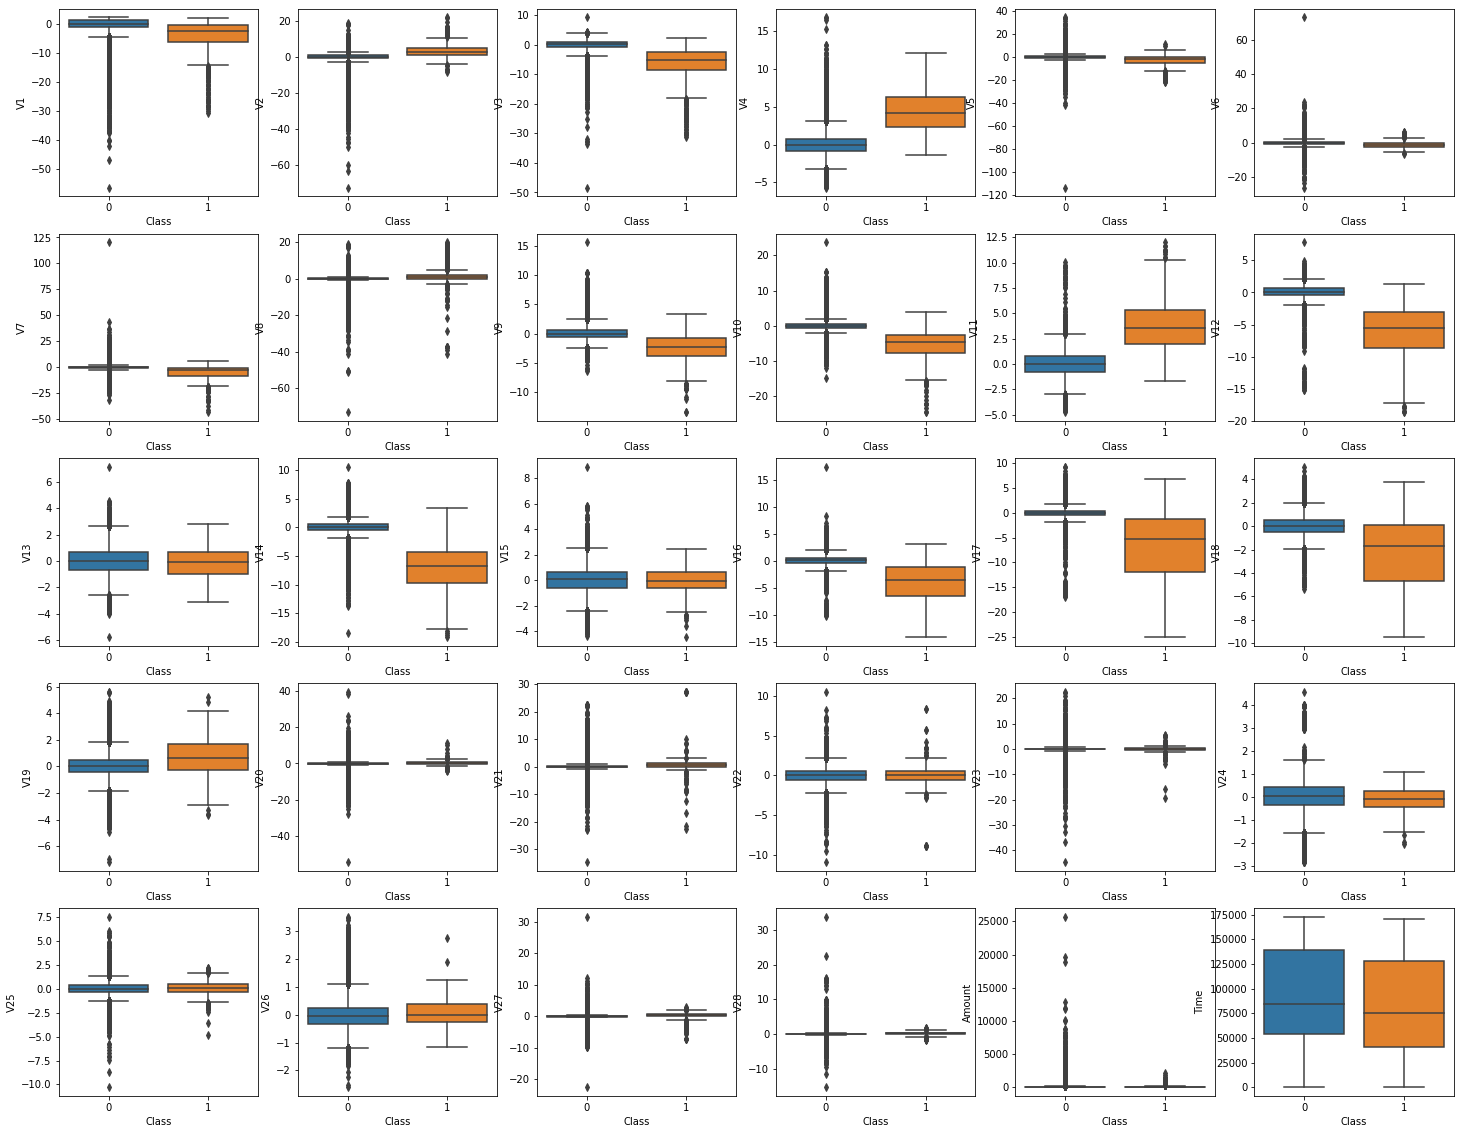

In [7]:
#BoxPlot_visualization 
fig=plt.figure(figsize=[25,20])

plt.subplot(5,6,1)
sns.boxplot(x="Class", y="V1", data=df)

plt.subplot(5,6,2)
sns.boxplot(x="Class", y="V2", data=df)

plt.subplot(5,6,3)
sns.boxplot(x="Class", y="V3", data=df)

plt.subplot(5,6,4)
sns.boxplot(x="Class", y="V4", data=df)

plt.subplot(5,6,5)
sns.boxplot(x="Class", y="V5", data=df)

plt.subplot(5,6,6)
sns.boxplot(x="Class", y="V6", data=df)

plt.subplot(5,6,7)
sns.boxplot(x="Class", y="V7", data=df)

plt.subplot(5,6,8)
sns.boxplot(x="Class", y="V8", data=df)

plt.subplot(5,6,9)
sns.boxplot(x="Class", y="V9", data=df)

plt.subplot(5,6,10)
sns.boxplot(x="Class", y="V10", data=df)

plt.subplot(5,6,11)
sns.boxplot(x="Class", y="V11", data=df)

plt.subplot(5,6,12)
sns.boxplot(x="Class", y="V12", data=df)

plt.subplot(5,6,13)
sns.boxplot(x="Class", y="V13", data=df)

plt.subplot(5,6,14)
sns.boxplot(x="Class", y="V14", data=df)

plt.subplot(5,6,15)
sns.boxplot(x="Class", y="V15", data=df)

plt.subplot(5,6,16)
sns.boxplot(x="Class", y="V16", data=df)

plt.subplot(5,6,17)
sns.boxplot(x="Class", y="V17", data=df)

plt.subplot(5,6,18)
sns.boxplot(x="Class", y="V18", data=df)

plt.subplot(5,6,19)
sns.boxplot(x="Class", y="V19", data=df)

plt.subplot(5,6,20)
sns.boxplot(x="Class", y="V20", data=df)

plt.subplot(5,6,21)
sns.boxplot(x="Class", y="V21", data=df)

plt.subplot(5,6,22)
sns.boxplot(x="Class", y="V22", data=df)

plt.subplot(5,6,23)
sns.boxplot(x="Class", y="V23", data=df)

plt.subplot(5,6,24)
sns.boxplot(x="Class", y="V24", data=df)

plt.subplot(5,6,25)
sns.boxplot(x="Class", y="V25", data=df)

plt.subplot(5,6,26)
sns.boxplot(x="Class", y="V26", data=df)

plt.subplot(5,6,27)
sns.boxplot(x="Class", y="V27", data=df)

plt.subplot(5,6,28)
sns.boxplot(x="Class", y="V28", data=df)

plt.subplot(5,6,29)
sns.boxplot(x="Class", y="Amount", data=df)

plt.subplot(5,6,30)
sns.boxplot(x="Class", y="Time", data=df)

plt.show()

In [ ]:
fig.savefig('Outlier_plot.png',bbox_inches='tight')

In [8]:
#Median_imputation
def median_imputation_outlier(df,col):
  sns.boxplot(x="Class", y=col, data=df)
  plt.title("Box Plot before median imputation")
  plt.show()
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1 - 1.5 * iqr
  Upper_tail = q3 + 1.5 * iqr
  med = np.median(df[col])
  for i in df[col]:
    if i > Upper_tail or i < Lower_tail:
      df[col] = df[col].replace(i, med)
  sns.boxplot(x="Class", y=col, data=df)
  plt.title("Box Plot after median imputation")
  plt.show()

In [9]:
imp_features=df.columns[:-1]

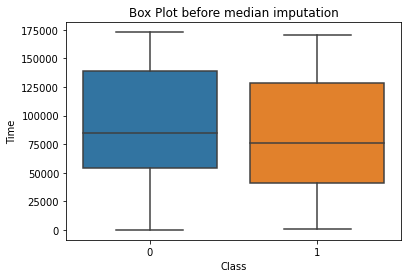

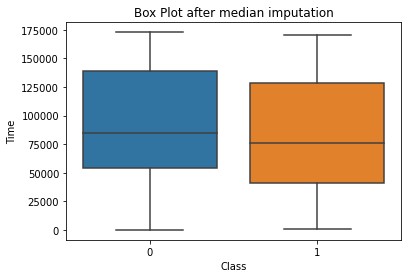

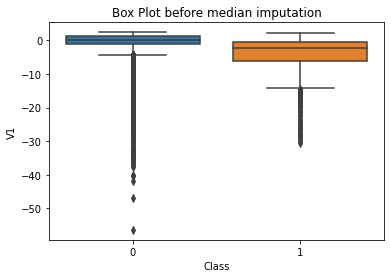

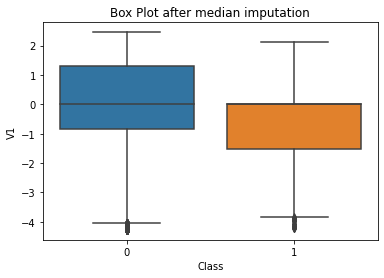

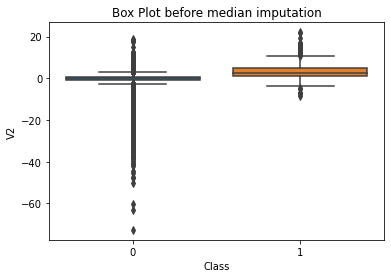

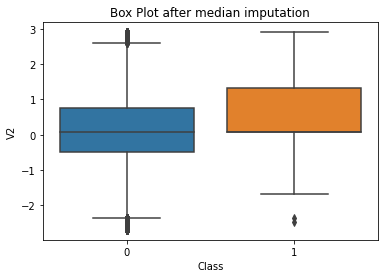

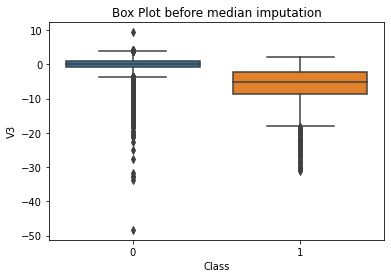

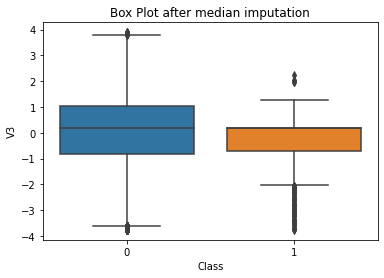

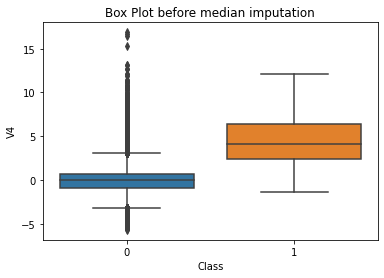

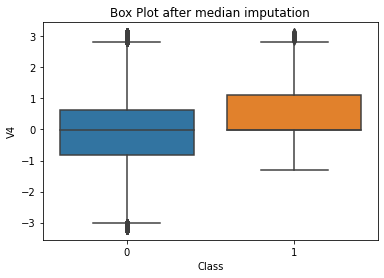

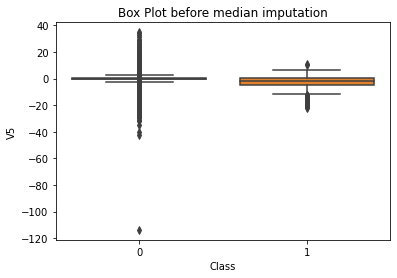

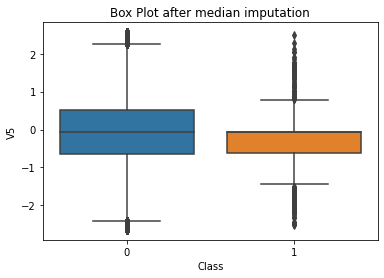

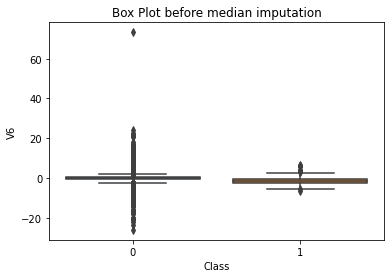

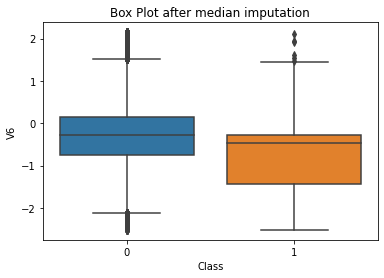

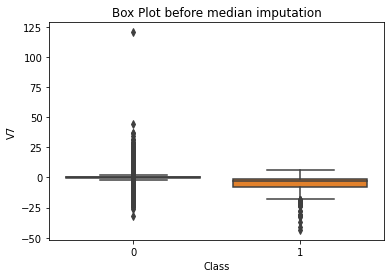

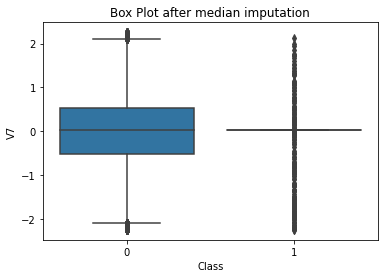

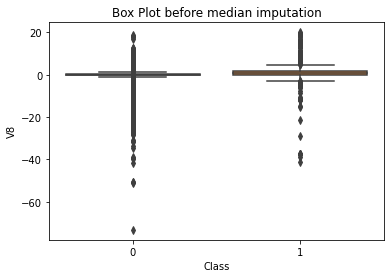

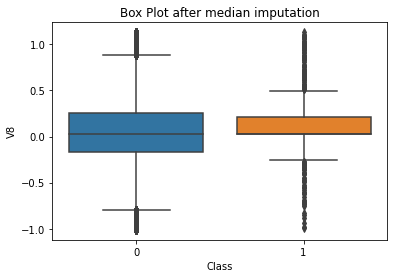

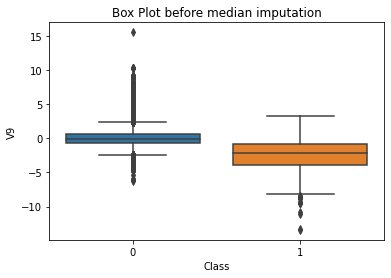

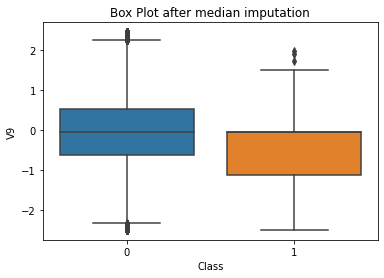

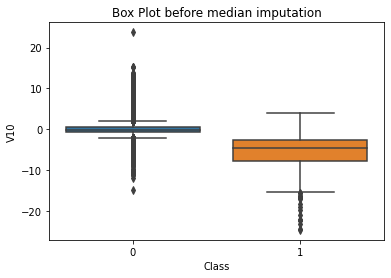

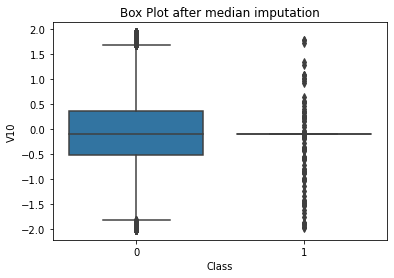

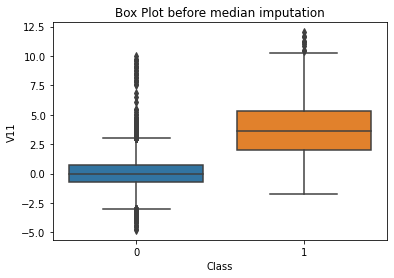

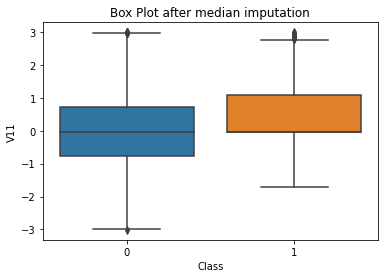

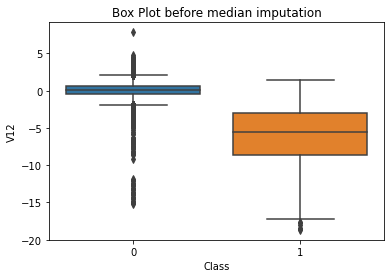

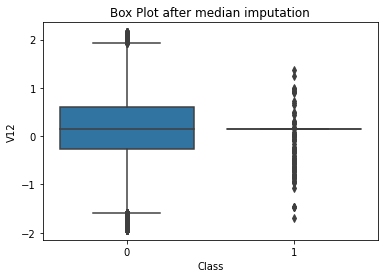

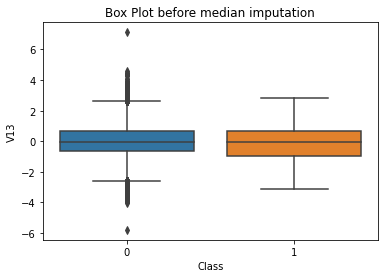

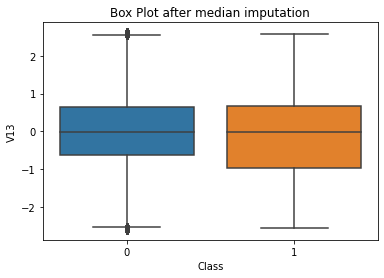

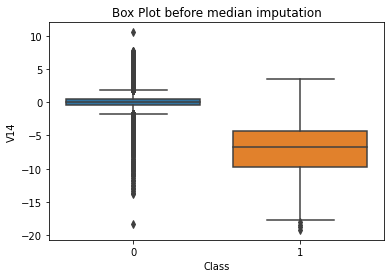

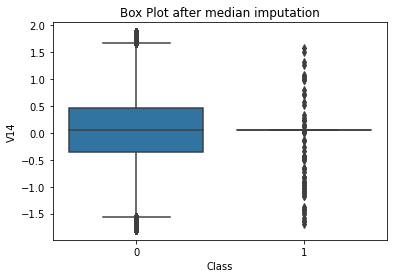

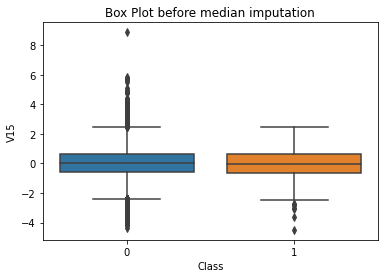

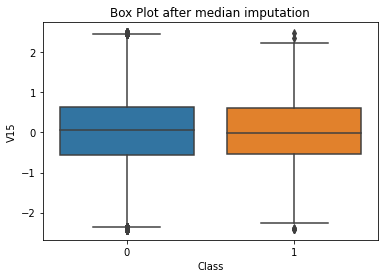

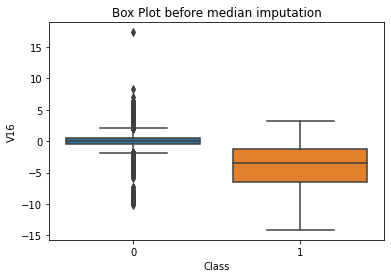

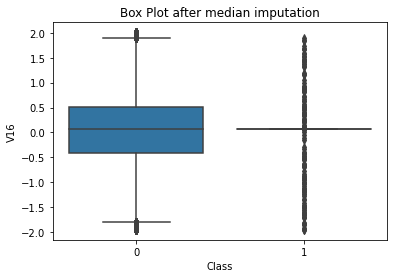

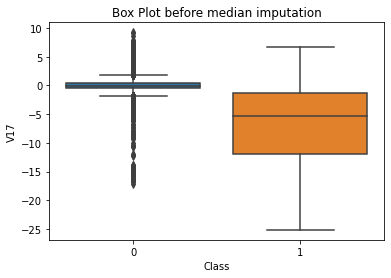

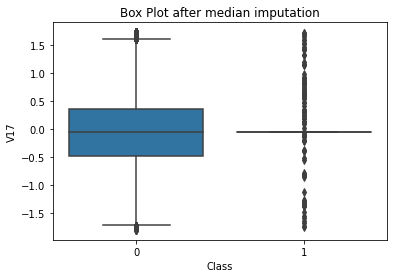

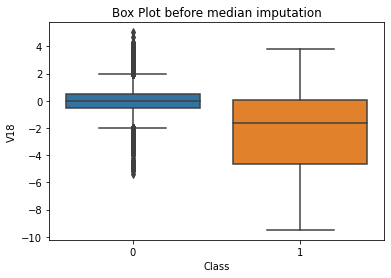

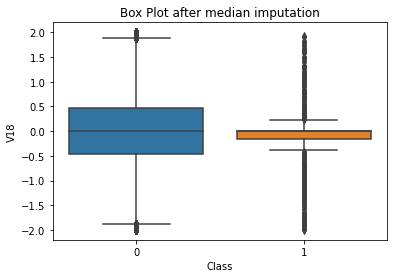

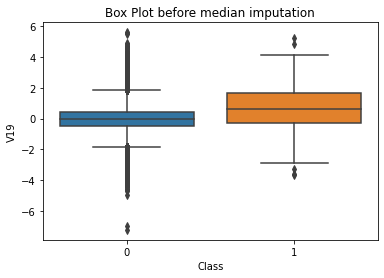

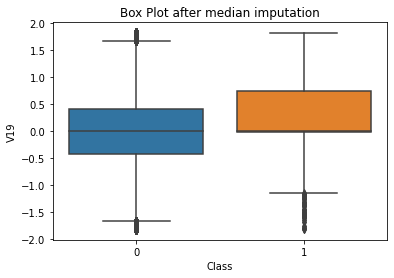

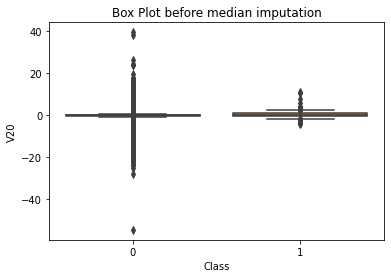

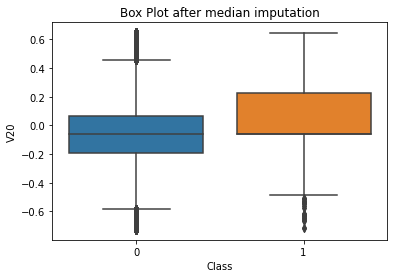

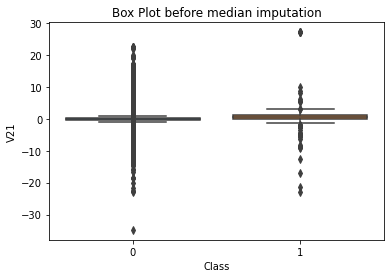

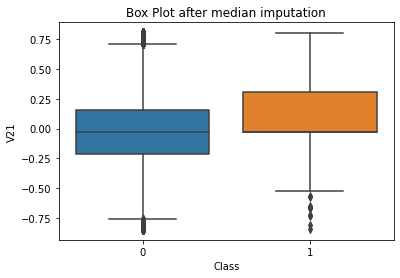

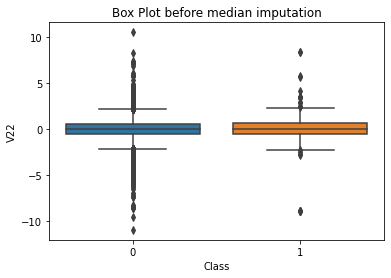

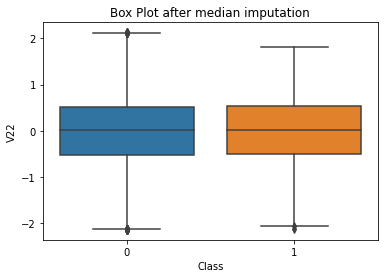

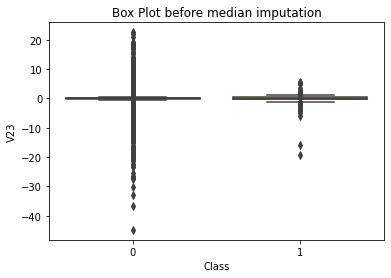

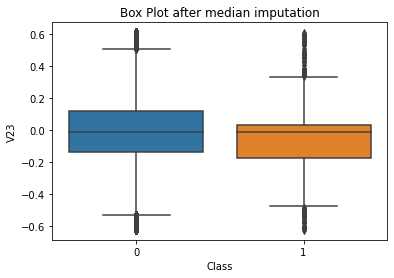

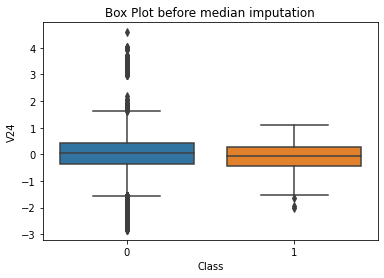

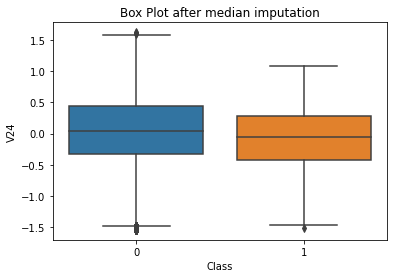

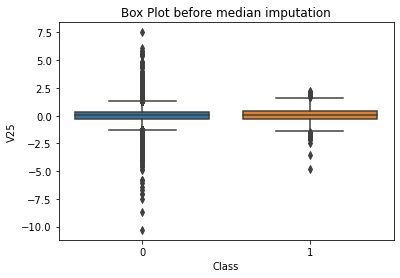

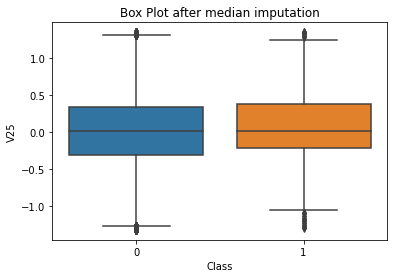

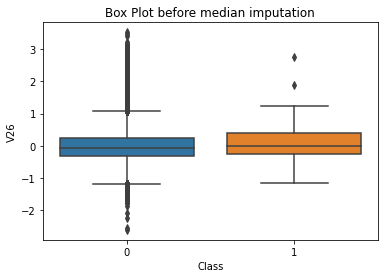

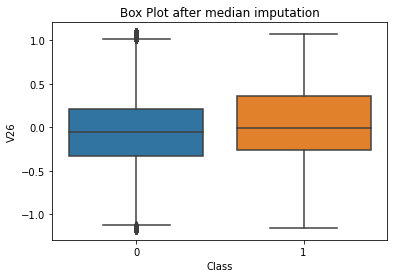

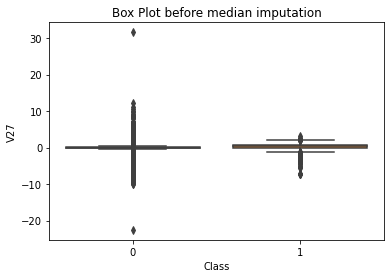

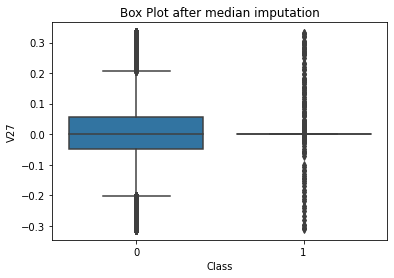

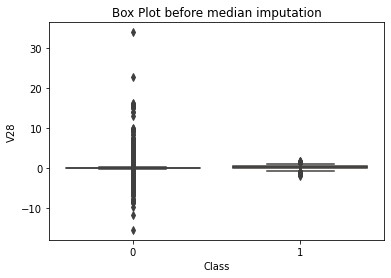

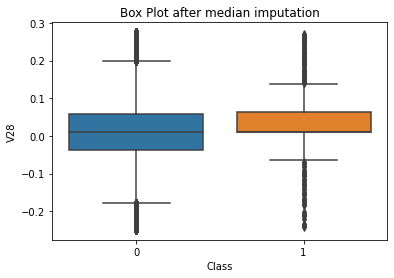

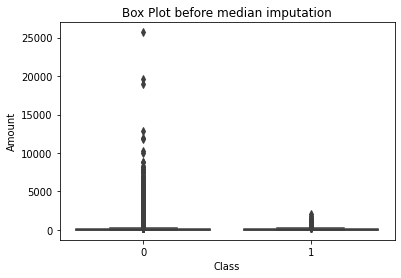

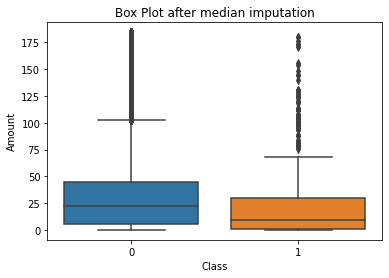

In [10]:
#imp_features=['V1', 'V3', 'V4', 'V5', 'V8', 'V10', 'V12', 'V14', 'V17']
for i in imp_features:
  median_imputation_outlier(df,i)

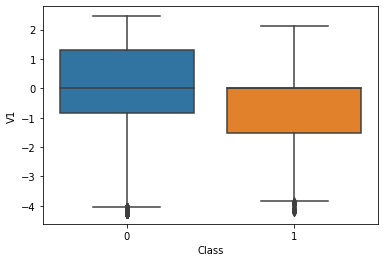

In [ ]:
sns.boxplot(x="Class", y='V1', data=df)
plt.show()

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.181959,0.081165,0.073230,-0.100997,-0.044778,-0.257460,0.015080,0.066713,-0.045892,-0.051248,-0.009122,0.141266,-0.011443,0.046064,0.020157,0.047815,-0.041767,0.006713,-0.004449,-0.055623,-0.020289,0.005924,-0.009692,0.027194,0.013164,-0.020734,0.011361,0.017208,33.521444,0.001727
std,47488.145955,1.436267,0.942255,1.306157,1.148624,0.931846,0.755161,0.767854,0.372279,0.926103,0.741512,0.990620,0.699694,0.941715,0.669388,0.869619,0.732699,0.611455,0.732990,0.675217,0.233602,0.264488,0.692161,0.215217,0.558842,0.457722,0.440939,0.113546,0.089974,39.950180,0.041527
min,0.000000,-4.274178,-2.701960,-3.765986,-3.235785,-2.646763,-2.518560,-2.240378,-1.012514,-2.503304,-2.019365,-3.014163,-1.941280,-2.615081,-1.803441,-2.430337,-1.954869,-1.807049,-1.998189,-1.828879,-0.728845,-0.850534,-2.147970,-0.626074,-1.545484,-1.318803,-1.178778,-0.313658,-0.249805,0.000000,0.000000
25%,54201.500000,-0.831192,-0.499840,-0.821337,-0.822246,-0.649762,-0.755165,-0.511578,-0.165016,-0.617563,-0.510548,-0.761205,-0.268924,-0.635586,-0.354325,-0.557062,-0.409459,-0.479716,-0.465474,-0.414984,-0.190782,-0.209874,-0.535626,-0.140952,-0.326747,-0.300640,-0.324653,-0.047385,-0.036667,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.745641,1.026875,0.628275,0.515968,0.150336,0.536134,0.255645,0.531927,0.366826,0.732143,0.612706,0.637417,0.453390,0.644263,0.510871,0.351093,0.470193,0.417006,0.068720,0.158363,0.525180,0.119253,0.438783,0.343006,0.210818,0.054812,0.057478,44.400000,0.000000
max,172792.000000,2.454930,2.907101,3.894346,3.131204,2.566916,2.148841,2.256656,1.131305,2.457386,1.937893,2.991314,2.152466,2.628633,1.871167,2.494514,2.010105,1.724764,2.000177,1.831755,0.650075,0.808512,2.133863,0.611675,1.625118,1.352248,1.092853,0.333860,0.275131,184.500000,1.000000


In [12]:
#Check duplicate value
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [ ]:
#check null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

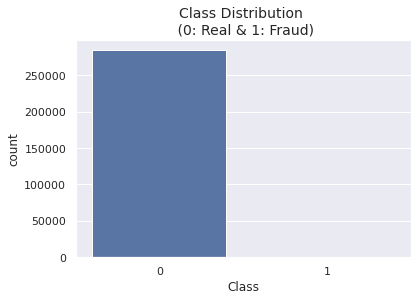

In [ ]:
#plot labels distribution
sns.set_theme(style="darkgrid")
sns.countplot(x='Class', data=df)
plt.title('Class Distribution \n (0: Real & 1: Fraud)',fontsize=14)
plt.savefig('class_distribution.png')
plt.show()

In [ ]:
Counter(df["Class"])

Counter({0: 284315, 1: 492})

In [13]:
X = df.drop("Class",axis="columns")
y = df.Class

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [14]:
#oversample the minority class to overcome the imbalanced problem
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
Counter(y)

Counter({0: 284315, 1: 284315})

In [ ]:
Oversampled_df=pd.concat([X, y], axis=1)

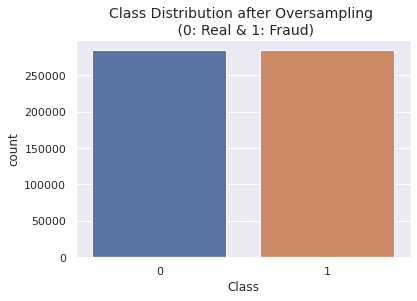

In [ ]:
#plot labels distribution
sns.set_theme(style="darkgrid")
sns.countplot(x='Class', data=Oversampled_df)
plt.title('Class Distribution after Oversampling \n (0: Real & 1: Fraud)',fontsize=14)
plt.savefig('class_distribution_Oversampled.png')
plt.show()

# **Check Multicollinearity**

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  

In [ ]:
vif_data.round(1)

,feature,VIF
0,Time,2.6
1,V1,14.2
2,V2,23.1
3,V3,26.1
4,V4,10.1
5,V5,27.3
6,V6,3.9
7,V7,65.4
8,V8,7.1
9,V9,6.9


In [ ]:
correlated_features = set()
correlation_matrix = df.corr()

In [ ]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.80:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
correlated_features

set()

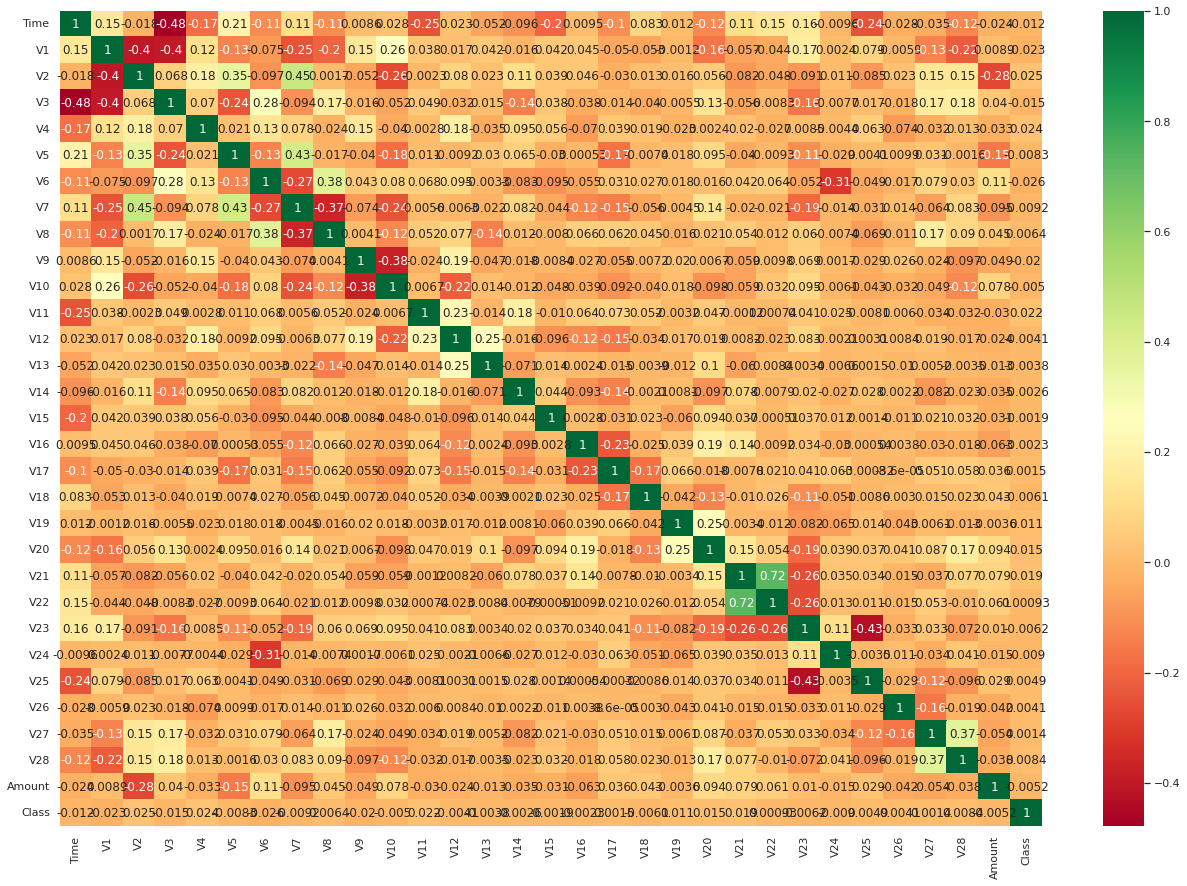

In [ ]:
plt.figure(figsize=(22,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="RdYlGn")
plt.savefig('Heatmap_corr.png')
plt.show()

**Feature Selection using Embedded Methods**




In [15]:
model = XGBClassifier()
model.fit(X, y)

XGBClassifier()

In [ ]:
def feature_importance_plot(model,X):
  temp = pd.DataFrame()
  temp['attr'] = X.columns
  temp['importance'] = model.feature_importances_
  temp = temp.sort_values(by='importance', ascending=False)
  plt.figure(figsize=(10, 10))
  plt.barh(y=temp['attr'], width=temp['importance'])
  plt.title('Feature Importances', fontsize=20, fontweight='bold', pad=20)
  plt.xlabel('Importance', fontsize=14, labelpad=20)
  plt.savefig('feature_importance_plot.png')
  plt.show()

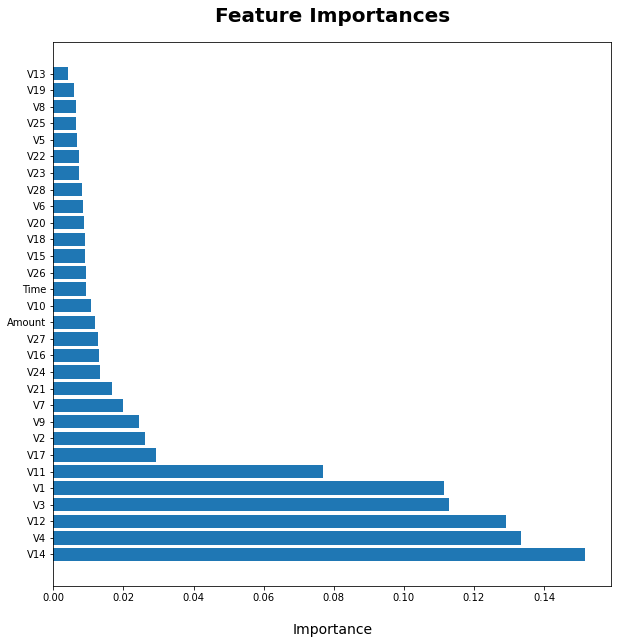

In [ ]:
feature_importance_plot(model,X)

**Train Model with the most important features**

In [16]:
important_features = pd.DataFrame((model.feature_importances_*100), index = X.columns, columns=['importance']).sort_values('importance', ascending=False)

In [17]:
important_features

,importance
V14,17.078568
V4,13.411331
V12,11.709393
V1,10.874991
V3,10.665726
V11,7.281759
V17,3.149866
V2,2.586107
V7,2.315182
V9,1.972050


In [18]:
X.columns[np.where(model.feature_importances_*100>1.8)]

Index(['V1', 'V2', 'V3', 'V4', 'V7', 'V9', 'V11', 'V12', 'V14', 'V17'], dtype='object')

In [19]:
X.drop(X.columns[np.where(model.feature_importances_*100<=1.80)], axis=1, inplace=True)

In [20]:
X.head()

,V1,V2,V3,V4,V7,V9,V11,V12,V14,V17
0,-1.359807,-0.072781,2.536347,1.378155,0.239599,0.363787,-0.551600,-0.617801,-0.311169,0.207971
1,1.191857,0.266151,0.166480,0.448154,-0.078803,-0.255425,1.612727,1.065235,-0.143772,-0.114805
2,-1.358354,-1.340163,1.773209,0.379780,0.791461,-1.514654,0.624501,0.066084,-0.165946,1.109969
3,-0.966272,-0.185226,1.792993,-0.863291,0.237609,-1.387024,-0.226487,0.178228,-0.287924,-0.684093
4,-1.158233,0.877737,1.548718,0.403034,0.592941,0.817739,-0.822843,0.538196,-1.119670,-0.237033


In [21]:
#train/test split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, stratify=y)

In [22]:
print(f"Training data:{X_tr.shape}")
print(f"Test data:{X_te.shape}")

Training data:(398041, 10)
Test data:(170589, 10)


In [23]:
#rescaling numeric attributes into a 0 to 1 range
train = X_tr.copy()
test = X_te.copy()
means_training = train.mean()
stds_training = train.std()
rescaled_train = (train - means_training) / stds_training
rescaled_test = (test - means_training) / stds_training
X_tr = rescaled_train
X_te = rescaled_test

## **Model Training & Evaluation**

In [24]:
#train XGB Clf
XGB_model=XGBClassifier(iterations=100,
    random_seed=42,
    learning_rate=0.6,
    custom_loss=['AUC', 'Accuracy'])


In [25]:
XGB_model.fit(X_tr,y_tr)

XGBClassifier(custom_loss=['AUC', 'Accuracy'], iterations=100,
              learning_rate=0.6, random_seed=42)

In [26]:
y_predicted = XGB_model.predict(X_te)

In [27]:
target_names=['normal','fraud']
report=classification_report(y_te, y_predicted,target_names=target_names)

In [28]:
print(report)

              precision    recall  f1-score   support

      normal       0.99      0.98      0.99     85294
       fraud       0.98      0.99      0.99     85295

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



In [29]:
class_names = ["Normal", "Fraud"]
def plot_confusion_matrix(matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix
    """


    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [30]:
def plotConfusion(model, X, y):
    y_true, y_pred = y, model.predict(X)
    # Compute confusion matrix
    matrix = confusion_matrix(y_true, y_pred)
    print(matrix)
    np.set_printoptions(precision=2)

    # Plot normalized confusion matrix
    plt.figure(figsize=(5,5))
    plot_confusion_matrix(matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')
    plt.savefig('Confusion_matrix.png')
    plt.show()

[[83829  1465]
 [  484 84811]]


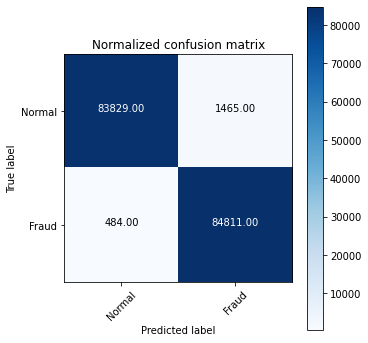

In [31]:
plotConfusion(XGB_model, X_te, y_te)

In [32]:
def plot_ROC_Curve(model,X_te,y_te):
  """
  This function plots the ROC Curve
  
  """
  probability = model.predict_proba(X_te)
  probs = probability[:, 1]
  roc = roc_auc_score(y_te.astype(float), probs)
  roc_2dec="{:.2f}".format(roc)
  fpr, tpr, thresholds = roc_curve(y_te.astype(float), probs)
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.plot(fpr, tpr, marker='.',label=f"ROC curve (area ={roc_2dec})")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.savefig('ROC_Curve_plot.png')
  plt.show()

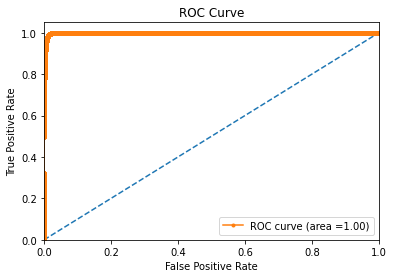

In [33]:
plot_ROC_Curve(XGB_model,X_te,y_te)

In [34]:
#MLP
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(200,), max_iter=100)

In [35]:
MLP.fit(X_tr, y_tr)
y_predicted = MLP.predict(X_te)

In [36]:
target_names=['normal','fraud']
report=classification_report(y_te, y_predicted,target_names=target_names)

In [37]:
print(report)

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     85294
       fraud       1.00      1.00      1.00     85295

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [ ]:
#train catboost clf
clf=CatBoostClassifier(iterations=100,
    random_seed=42,
    learning_rate=0.6,
    custom_loss=['AUC', 'Accuracy'])
clf.fit(X_tr,y_tr)

In [39]:
y_predicted = clf.predict(X_te)

In [40]:
target_names=['normal','fraud']
report=classification_report(y_te, y_predicted,target_names=target_names)

In [41]:
print(report)

              precision    recall  f1-score   support

      normal       1.00      0.99      1.00     85294
       fraud       0.99      1.00      1.00     85295

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



[[84555   739]
 [   80 85215]]


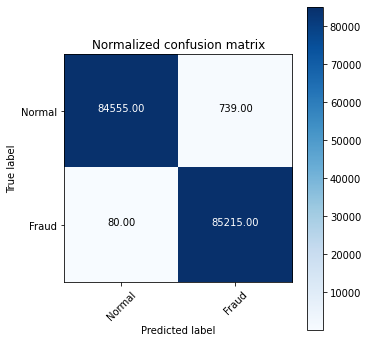

In [42]:
plotConfusion(clf, X_te, y_te)

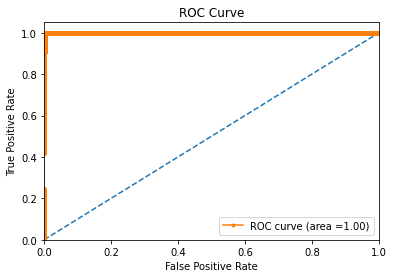

In [43]:
plot_ROC_Curve(clf,X_te,y_te)

**Hypothesis Test for Comparing Models with Threshold=0.05**

In [ ]:
# check if difference between algorithms is real 
#threshold =0.05
t, p = paired_ttest_5x2cv(estimator1=XGB_model, estimator2=clf,X=X,y=y,scoring='accuracy',random_seed=42)


In [45]:
print(f'The P-value is : {p:.3f}')
print(f'The t-statistics is : {t:.3f}')
# interpret the result
if p <= 0.05:
    print('Two algorithms are significantly different.')
else:
    print('The two algorithms is not significantly different.')

The P-value is : 0.000
The t-statistics is : -12.171
Two algorithms are significantly different.
